# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb
import datetime as dt

data = pd.read_csv('Netflix subscription fee Dec-2021.csv')
data.head()

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26
1,au,Australia,6114,4050,2064,7.84,12.12,16.39
2,at,Austria,5640,3779,1861,9.03,14.67,20.32
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

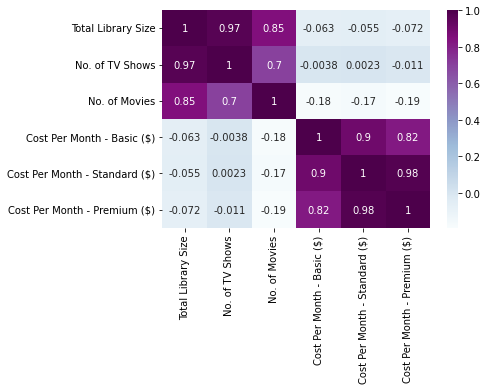

In [4]:
sb.heatmap(data.corr(), cmap="BuPu", annot = True)
plt.show();



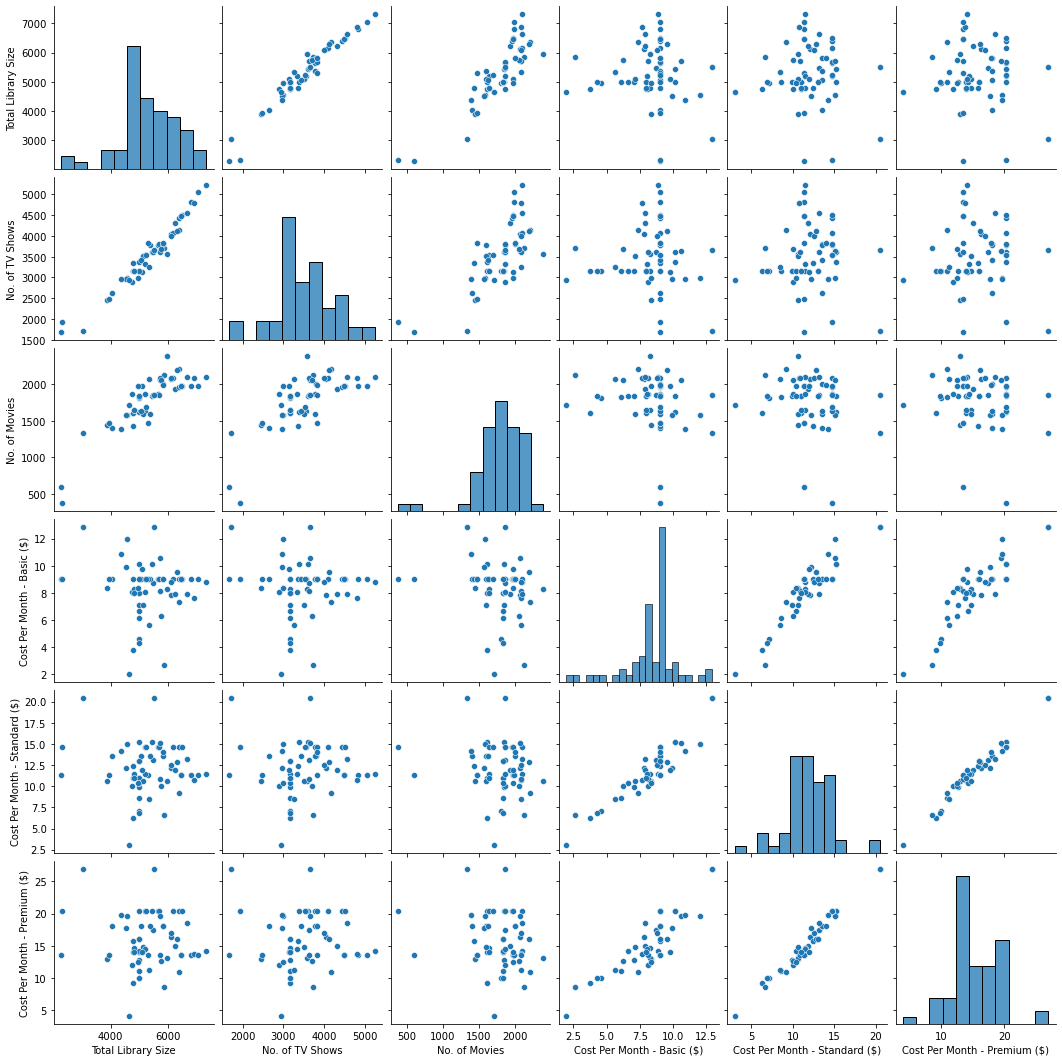

In [15]:
sb.pairplot(data)

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [1]:
#No of Tv shows and Library size coorelation is high 

In [17]:
# Step 1 is to assign your x and y
# Creating X and y
X = data['Total Library Size']
y = data['No. of TV Shows']
# Step 2 is to create your train and test sets
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [18]:
# Step 3 is to build the model. Remember to import any libraries you may need
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)# Step 3 is to build the model. Remember to import any libraries you may need

C:\Users\pooja\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [19]:
# Step 4 is to perform residual analysis
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const                -630.710387
Total Library Size      0.773124
dtype: float64

## Error Terms

Finally, plot your error terms!

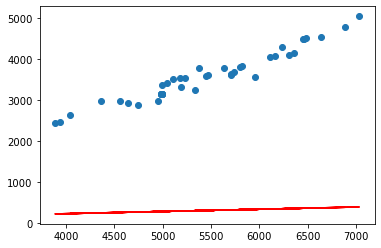

In [20]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

In [35]:
def linear_regression(X, Y):     
    N = len(X)
    x_mean = X.mean()
    y_mean = Y.mean()
    
    B1_num = ((X - x_mean) * (Y - y_mean)).sum()
    B1_den = ((X - x_mean)**2).sum()
    B1 = B1_num / B1_den
    
    B0 = y_mean - (B1*x_mean)
    
    reg_line = 'Y = {} + {}β'.format(B0, round(B1, 3))
    
    return (B0, B1, reg_line)


In [36]:
def corr_coef(x, y):
    N = len(x)
    
    num = (N * (x*y).sum()) - (x.sum() * y.sum())
    den = np.sqrt((N * (x**2).sum() - x.sum()**2) * (N * (y**2).sum() - y.sum()**2))
    R = num / den
    return R

In [37]:
X = data['Total Library Size']
Y = data['No. of TV Shows']
B0, B1, reg_line = linear_regression(X, Y)
print('Regression Line: ', reg_line)
R = corr_coef(X, Y)
print('Correlation Coef.: ', R)
print('"Goodness of Fit": ', R**2)

Regression Line:  Y = -287.4566025602053 + 0.716β
Correlation Coef.:  0.9711459692193743
"Goodness of Fit":  0.943124493531038


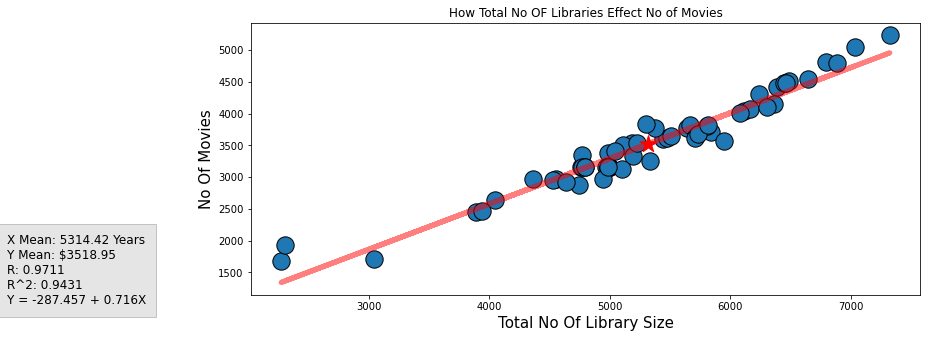

In [52]:
plt.figure(figsize=(12,5))
plt.scatter(X, Y, s=300, linewidths=1, edgecolor='black')
text = '''X Mean: {} Years
Y Mean: ${}
R: {}
R^2: {}
Y = {} + {}X'''.format(round(X.mean(), 2), 
                       round(Y.mean(), 2), 
                       round(R, 4), 
                       round(R**2, 4),
                       round(B0, 3),
                       round(B1, 3))
plt.text(x=1, y=1000, s=text, fontsize=12, bbox={'facecolor': 'grey', 'alpha': 0.2, 'pad': 10})
plt.title('How Total No OF Libraries Effect No of Movies')
plt.xlabel('Total No Of Library Size', fontsize=15)
plt.ylabel('No Of Movies', fontsize=15)
plt.plot(X, B0 + B1*X, c = 'r', linewidth=5, alpha=.5, solid_capstyle='round')
plt.scatter(x=X.mean(),y=Y.mean(), marker='*', s=10**2.5, c='r') # average point

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value?  0.943124493531038
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? It was Effictive in this case . But Not for cost and library sizes or movie sizes.
3. Was your plot of the error terms a bell curve? Not really